## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [213]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [214]:
df = pd.read_csv('ab_data.csv')
# inspect dataset using head()
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [215]:
# show general information and statistics of complete dataset
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


b. Use the below cell to find the number of rows in the dataset.

In [216]:
# determine number of rows using shape()
num_rows = df.shape[0]
print('Number of rows in dataset: ',num_rows)

Number of rows in dataset:  294478


c. The number of unique users in the dataset.

In [217]:
# determine number of unique users using nunique()
num_users = df['user_id'].nunique()
print('Number of unique users in dataset: ',num_users)

Number of unique users in dataset:  290584


d. The proportion of users converted.

In [218]:
# determine number of converted users using mean(), since the column only contains 0 or 1 as values
p_converted = df['converted'].mean()
print('Proportion of converted users: ',p_converted)

Proportion of converted users:  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [219]:
# determine the number of rows, where 'new_page' does not line up with 'treatment' using len() and query()
# we have two possibilities for this mismatch:
#   1st treatment group users landed on old page
#   2nd control group users landed on new page

num_treatment_oldpage = len(df.query('group == "treatment" and landing_page == "old_page"'))
print('Number of times users of the treatment group landed on the old page: ',num_treatment_oldpage)

num_control_newpage = len(df.query('group == "control" and landing_page == "new_page"'))
print('Number of times users of the control group landed on the new page: ',num_control_newpage)

print('Number of times treatment and new_page do not line up: ',num_treatment_oldpage+num_control_newpage)

Number of times users of the treatment group landed on the old page:  1965
Number of times users of the control group landed on the new page:  1928
Number of times treatment and new_page do not line up:  3893


f. Do any of the rows have missing values?

In [220]:
# check for NaN-values in dataframe and show additional information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 7.9+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [221]:
# delete rows where treatment is not aligned with new_page or control is not aligned with old_page
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index,inplace = True)
df.drop(df.query('group == "control" and landing_page == "new_page"').index,inplace = True)
df2 = df

In [222]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [223]:
# determine number of unique users using nunique()
num_users2 = df2['user_id'].nunique()
print('Number of unique users in dataset: ',num_users2)

Number of unique users in dataset:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [224]:
# check user_id dataset for duplicates using duplicated()
sum(df2['user_id'].duplicated())

1

In [225]:
# identify duplicated user_id using duplicated()
id_duplicated = df2[df2.duplicated(['user_id'])]['user_id'].values
print('The user IDs of duplicated users are: ',id_duplicated)

The user IDs of duplicated users are:  [773192]


c. What is the row information for the repeat **user_id**? 

In [226]:
# show all information of the user with duplicated id
df2[df2['user_id']==id_duplicated[0]]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [227]:
# delete duplicated user record (delete second entry by timestamp)
df2 = df2[df2['timestamp'] != "2017-01-14 02:55:59.590927"]
# check user_id dataset for duplicates using duplicated() -> must be 0
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [228]:
# determine number of converted users using mean(), since the column only contains 0 or 1 as values
p_converted2 = df2['converted'].mean()
print('The probability of an individual converting: ', p_converted2)

The probability of an individual converting:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [229]:
# determine the probability of an individual of the control group converting
p_control_converted = df2[df2['group'] == 'control']['converted'].mean()
print('The probability of an individual in the control group converting: ', p_control_converted)

The probability of an individual in the control group converting:  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [230]:
# determine the probability of an individual of the treatment group converting
p_treatment_converted = df2[df2['group'] == 'treatment']['converted'].mean()
print('The probability of an individual in the treatment group converting: ', p_treatment_converted)

The probability of an individual in the treatment group converting:  0.11880806551510564


d. What is the probability that an individual received the new page?

In [231]:
# determine the probability of an individual receiving the new page by counting the respective users and dividing them by the total number of users
num_newpage = df2[df2['landing_page'] == 'new_page']['user_id'].count()
num_total = df2['user_id'].count()
p_newpage = num_newpage / num_total
print('The probability of an individual receiving the new page: ', p_newpage)

The probability of an individual receiving the new page:  0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Does the new page leads to more conversions?**

**Evidences:**

The probability of a conversion of an individual in the treatment group is 11.8807 %.

The probability of a conversion of an individual in the control group is 12.0386 %.

There is a difference in conversion depending on the group, but only by a very small margin of approximately 0.15 % in favor of the old page.
This margin is not sufficient or practical significant since other potentially influencing factors might affect the results. E.g., there could be change aversion effects leading to better result for the old page. This influence was not taken into account of the evaluation.
Thus, we cannot state with certainty that one page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis:**
- $H_0: p_{old} \geq p_{new}$
- $H_1: p_{old} < p_{new}$

**or:**
- $H_0: p_{old} - p_{new} \geq 0$ 
- $H_1: p_{old} - p_{new} < 0$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [232]:
# determine the convert rate using the mean() on the converted column
p_new = df2['converted'].mean()
print("The convert rate for p_new under the null: ",p_new)

The convert rate for p_new under the null:  0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [233]:
# determine the convert rate using the mean() on the converted column
p_old = df2['converted'].mean()
print("The convert rate for p_old under the null: ",p_old)

The convert rate for p_old under the null:  0.11959708724499628


c. What is $n_{new}$?

In [234]:
# determine n_new by counting the elements of the treatment group
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
print('Elements of treatment group n_new: ',n_new)

Elements of treatment group n_new:  145310


d. What is $n_{old}$?

In [235]:
# determine n_old by counting the elements of the control group
n_old = df2[df2['group'] == 'control']['user_id'].count()
print('Elements of treatment group n_old: ',n_old)

Elements of treatment group n_old:  145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [236]:
# simulate transactions using random.choice
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
print('Size of new_page_converted: ', len(new_page_converted))

Size of new_page_converted:  145310


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [237]:
# simulate transactions using random.choice
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])
print('Size of old_page_converted: ', len(old_page_converted))

Size of old_page_converted:  145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [238]:
# The sizes of the simulated transactions are not equal. So, we have to adjust new_page_converted to the size old_page_converted.
new_page_converted = new_page_converted[:len(old_page_converted)]
print('Size of new_page_converted: ', len(new_page_converted))

Size of new_page_converted:  145274


In [239]:
# calculate p_diff = p_new - p_old for simulated values
p_diff  =  (new_page_converted /n_new) - (old_page_converted/n_old)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [240]:
# define empty array
p_diffs = []

# perform the parts of a. through g. 10,000 times and store the difference values in p_diffs
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Frequency')

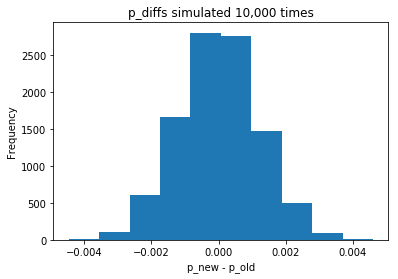

In [246]:
plt.hist(p_diffs);
plt.title('p_diffs simulated 10,000 times')
plt.xlabel('p_new - p_old')
plt.ylabel('Frequency')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [250]:
# calculate the actual difference observed in ab_data.csv
diff_actual = df[df['group'] == 'treatment']['converted'].mean() - df[df['group'] == 'control']['converted'].mean()
print('The actual difference in the original dataset: ',diff_actual)

# convert p_diffs into numpy array for further processing
p_diffs = np.array(p_diffs)

# calculate the proportion of p_diffs larger than the actual difference
p_val = (diff_actual > p_diffs).mean()
print('P-Value: ', p_val)

The actual difference in the original dataset:  -0.0015790565976871451
P-Value:  0.093


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

In part **j**, the p-values are calculated. The p-value provides the probability for a given statistical model that, when the null hypothesis is true, the statistical summary would be the same as or of greater magnitude than the actual observed results.

Since old and new pages perform quite similarly, we fail to reject the null hypothesis. Furthermore, the old pages are a little bit better, as parts 4a. and 4b. show. Thus, there is no advantage in conversion from old to new pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [252]:
import statsmodels.api as sm

# calculate the number of conversions for each page by summing up the group elements that converted
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])

print('Conversion in control group: ',convert_old)
print('Conversion in treatment group: ',convert_new)

# calculate the number of individuals who received each page by determine the amount of each group elements
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print('Number of individuals who received old page: ',n_old)
print('Number of individuals who received new page: ',n_new)

Conversion in control group:  17489
Conversion in treatment group:  17264
Number of individuals who received old page:  145274
Number of individuals who received new page:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [254]:
# proportion hypothesis test using statsmodels to calculate 
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('Z-Score: ',z_score)
print('P-Value: ', p_value)

Z-Score:  1.3109241984234394
P-Value:  0.9050583127590245


In [259]:
# As shown in http://knowledgetack.com/python/statsmodels/proportions_ztest/, the significance and the critical value 
# can be determined by calculating the CDF of the z-score as well as the comparison with the critical value at 95% confidence
# for a one-sided proportion hypothesis test
from scipy.stats import norm

print('CDF of Z-Score: ', norm.cdf(z_score))
print('Z-Score: ', z_score, ' < ',norm.ppf(1-0.05))

CDF of Z-Score:  0.9050583127590245
Z-Score:  1.3109241984234394  <  1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Conclusion**:

- As seen in **m**, the z-score is less than the critical value for a one-sided test. Thus, we fail to reject the null hypothesis.
- This conclusion matches the finding in parts **j**. and **k**, since the differences between the conversion rates of the old and new page are quite similar.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [261]:
# add intercept column
df2['intercept'] = 1
# add control and treatment columns as dummy variables
df2[['control','treatment']] = pd.get_dummies(df2['group'])

df2.head()

c:\python35\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\python35\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [263]:
# import statsmodels and perform a logistic regression for columns converted as response and group as explanatory (control is baseline)
import  statsmodels.api  as sm
log_mod = sm.Logit(df2['converted'],df2[['intercept','treatment']])

# fit the model
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [264]:
# show summary of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:               8.077e-06
Time:                        21:47:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**

P-value associated with ab_page: **0.19**

The hypothesis in Part II was:
- $H_0: p_{old} - p_{new} \geq 0$ 
- $H_1: p_{old} - p_{new} < 0$

In this part, the hypothesis is changed to:
- $H_0: p_{old} - p_{new} = 0$ 
- $H_1: p_{old} - p_{new} != 0$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

There are other factors, that should be considered in our regression model, since they might have influence on the conversion and, thus, on the observed conversion rate. Examples might be:
- The composition of the groups might influence the result, because change aversion could occur in older candidates and, on the other side, a novelty effect could occur within a group of new candidates. These information and their influence on the conversion have not been taken into account.
- Another factor regarding the user of the website might be the prior knowledge, experience, age and professional background of the user, since it could affect the behaviour of conversion.
- Websites are often tested and adjusted using a special system, browser or device. Thus, it might be interesting, if there is any correlation between the used system, the page was received, or not.
- The dataset also provides timestamp data of the call of the page. Combined with regional data, we might derive seasonal and/or weather information and respective correlation with the conversion rate.

Disadvantages to adding additional terms into the regression model:
- it is not possible to take all influencing factors into account, since the model would be too complex. 
- Predictor variables might not be uncorrelated with another, thus, multicollinearity could occur and affect the model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [266]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [267]:
# Check the variables in column country
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [274]:
# Create columns with dummy variables in dataframe
df_new[['UK','US','CA']] = pd.get_dummies(df_new['country'])
# drop on column (here: UK) since the predictor must be full rank
df_new.drop('UK',axis=1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,US,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [275]:
# Fit Your Linear Model And Obtain the Results
# Add an intercept column
df_new['intercept'] = 1

# Create a logistic regression model to predict the regional influence (baseline=UK) on conversion
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.382864
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 12 Aug 2018   Pseudo R-squ.:                -0.04573
Time:                        22:25:22   Log-Likelihood:            -1.1125e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
US            -1.9868      0.011   -174.174      0.000      -2.009      -1.964
==============================================================================
"""

In [276]:
# perform an exponential function to the coefficient to get the probability between 0 and 1
np.exp(results.params)

CA    0.135779
US    0.137132
dtype: float64

In [279]:
# Since the coefficients for US and CA are negative, it is better to calculate a decrease by providing the reciprocal
1/np.exp(results.params)

CA    7.364925
US    7.292253
dtype: float64

<a id='conclusions'></a>
## Conclusions

- The logistic regression model also provides values, that do not show an essential difference regarding the conversion rates for both groups of users.
- The p-value in our regression model regarding regional data shows a statistical significance of these information.
- As a conclusion for the decision whether the new page should be implemented or the old one should be kept, this experiment indicates that we fail to reject the null hypothesis. Thus, we can keep the existing website!

## Resources
- Udacity Data Analyst Nanodegree - Videos and Resources
- Analyze_ab_test_results_notebook.ipynb
- Youtube: [Practical Stats Project Walkthrough Final](https://www.youtube.com/watch?v=7FTp9JJ5DfE&feature=youtu.be)